In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from os.path import join as pjoin
from matplotlib import pyplot as plt
import random
import warnings
import keras
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,Conv1D,GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D,AveragePooling1D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import average 
from keras.models import Input, Model
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# Video_label=pd.read_excel('new23label.xlsx')
# group=Video_label.groupby('label')
# M=group.mean()
# M.to_csv('new23label.csv')
# random.uniform(-0.3, 0.3)

In [3]:
# first we can see what does the feature look like
def get_raw_feature():
    video_data_dir='new23feature'
    X=[]
    Y=[]
    for video in os.listdir(video_data_dir):
        each_video= pjoin(video_data_dir,video)
        ## 'C:\\videofeature\\' using
#         l=each_video.split('t_')[1]

        # 'C:\\new_video_feature\\' using
        l=each_video.split('e_')[1]
        l=l.split('.')[0]
        LABEL=int(l)
        X.append(np.load(each_video))
        Y.append(LABEL)
#     Video_label=pd.read_csv('label.csv')
# #     Video_label=np.array(Video_label)[:,:-1]
    return X,Y


## 1 Read features from 19 npy files

In [4]:
X,Y=get_raw_feature()
Video_label=pd.read_csv('newall_label.csv')
# Video_label=np.array(Video_label)[:,:-1]
print('there are ',len(X),'videos')
print('feature of video [0]',X[0].shape)
print('video [0] is from video' ,Y[0])
print(Y)

there are  23 videos
feature of video [0] (153, 14)
video [0] is from video 11
[11, 113, 130, 143, 152, 164, 16, 171, 192, 176, 207, 194, 236, 237, 240, 253, 258, 257, 49, 59, 74, 78, 91]


In [5]:
Video_label

,GEARS - Depth Perception,GEARS - Bimanual Dexterity,GEARS - Efficiency,GEARS - Force Sensitivity,GEARS - Autonomy,GEARS - Robotic Control,label
0,2.000000,1.666667,2.000000,1.333333,2.666667,2.333333,11
1,1.333333,1.000000,1.000000,1.000000,1.000000,1.333333,16
2,3.000000,3.000000,2.000000,2.333333,2.666667,2.666667,49
3,2.333333,1.666667,1.666667,2.000000,1.666667,1.666667,59
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,74
5,2.500000,3.000000,2.000000,2.000000,2.500000,2.000000,78
6,4.000000,4.000000,4.000000,4.500000,4.500000,5.000000,91
7,2.500000,3.000000,2.500000,2.500000,3.000000,2.500000,113
8,3.000000,3.000000,2.500000,2.500000,3.000000,3.000000,130
9,3.000000,2.500000,2.500000,2.000000,2.500000,2.500000,143


Video_label contains detail labels and we can use Y to index them later.

In [6]:
def getlabel(number):
    L=Video_label[Video_label['label']==number]
    L=np.array(L)[:,:-1]
    L= np.squeeze(L)
    return L
# def getlabel_addnoise(number):
#     L=Video_label[Video_label['label']==number]
#     L=np.array(L)[:,:-1]
#     L= np.squeeze(L)
#     noise=np.array([random.uniform(-0.4, 0.4) for _ in range(len(L))])
# #     print(noise)
#     return L+noise

In [7]:
# noise=getlabel_addnoise(16)
# print(noise)

Here we create two functions to sample video clips from each video and get their time differences.


In [8]:
def get_diff_and_hstack_to_orginal_data(X,time_lag=2,move_threshold=200):
    original=X[:-time_lag]
    modified=X[time_lag:]
    result=modified-original
    ## threshold
    # consider there was no top in the first image and it showed up in the next image
    # the difference would be huge, which was not ideal.
    # so we need to filter these extrem value 
    result[np.abs(result)>move_threshold]=0
    
    return np.hstack((X[time_lag:],result))

##from each video sample video clips with size=window_L. you can specify stride 
def make_video_clips(matrix,window_L,stride):
    alldata=[]

    total_frame=matrix.shape[0]
    index=[n for n in range(1,total_frame,stride)]
    for start_index in index:
        if start_index+window_L> total_frame:
            break
#         print(start_index)
        each_clip_data=matrix[start_index:start_index+window_L]
#         each_clip_data=np.transpose(each_clip_data)
#         print(each_clip_data.shape)
        alldata.append(each_clip_data)
    return np.array(alldata)

## 2 pre-processing the feature
make new 28-d feature and  sample video clips

In [9]:
####################################### set video clips parameters
############################################### make new 28-d feature
video_clips_length=30
time_lag=2
move_threshold=150
stride=video_clips_length

####################################### set video clips parameters
############################################### make new 28-d feature
all_data=[]
for each_video,label in zip(X,Y):

    re=get_diff_and_hstack_to_orginal_data(each_video,time_lag,move_threshold)
#     re=each_video
    video_clip=make_video_clips(re,video_clips_length,stride)
    print(video_clip.shape)
    all_data.append((video_clip))


(5, 30, 28)
(4, 30, 28)
(10, 30, 28)
(20, 30, 28)
(10, 30, 28)
(40, 30, 28)
(100, 30, 28)
(19, 30, 28)
(5, 30, 28)
(100, 30, 28)
(10, 30, 28)
(100, 30, 28)
(10, 30, 28)
(5, 30, 28)
(20, 30, 28)
(40, 30, 28)
(9, 30, 28)
(99, 30, 28)
(20, 30, 28)
(40, 30, 28)
(20, 30, 28)
(10, 30, 28)
(10, 30, 28)


In [10]:
c=all_data[0]

In [11]:
c[0][2]

array([ 49, 183,   0,   0, 140, 160, 327,  72, 202, 162, 279,  77, 266,
       128, -35,   0,   0,   0, -29,  -1,   0,  72, -41,  -8,   1,   1,
        -2,   1], dtype=int32)

So there are 19 videos and you can see how many video clips they have.

And next we will use leave one method to train the model.

## 3 prepare leave one data and give every video clips their label

In [12]:
# this function is used to stack 18 videos into a big matrix
# the dimenstion will be 
# (n1+n2..+n18,28,30)
# and the label will be (n1+n2..+n18,6)

def stack_video_clips_get_label(data,label):
    final_data=data[0]

    final_label=[getlabel(label[0]) for _ in range(final_data.shape[0])]
#     print(len(final_label))
#     print(final_data.shape)
    for i in range(1,len(data)):
        final_data=np.vstack((final_data,data[i]))
        for j in range(data[i].shape[0]):
            final_label.append(getlabel(label[i]))
    return final_data,np.array(final_label)

########## leave one and stack all video clips
def hold_out(X,Y,hold_number):
        new_label=Y.copy()
        new_data=X.copy()
        # find video n 's index
        index=new_label.index(hold_number)
        # get the video n and it's label
        X_test=new_data[index]
        test_label=getlabel(hold_number)
        y_test=np.array([test_label for _ in range(X_test.shape[0])])
#         # so we can del them 
        del new_label[index]
        del new_data[index]
#         print(new_label)
        final_data_X,final_data_Y=stack_video_clips_get_label(new_data,new_label)

        return final_data_X,X_test,final_data_Y,y_test


In [13]:
# hold_out_number=130
# X_train, X_test, y_train, y_test=hold_out(all_data,Y,hold_out_number)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)
# new_label=Y.copy()
# new_data=X.copy()
# # find video n 's index
# index=new_label.index(hold_number)
# get the video n and it's label
# X_test=new_data[index]
# test_label=getlabel(11)
# y_test=np.array([test_label for _ in range(X_test.shape[0])])

In [14]:
# customized data generator
def generator_noise(data, label, batch_size=64):
    while 1:
        rows = np.random.randint(0, data.shape[0], size=batch_size)

        samples = data[rows]
        y=label[rows]
        noise=np.random.uniform(low=-0.5, high=0.5, size=(y.shape[0],y.shape[1]))
        y=y+noise
        yield samples,y
        
def generator(data, label, batch_size=64):
    while 1:
        rows = np.random.randint(0, data.shape[0], size=batch_size)

        samples = data[rows]
        y=label[rows]
#         noise=np.random.uniform(low=-0.5, high=0.5, size=(y.shape[0],y.shape[1]))
#         y=y+noise
        yield samples,y

In [15]:
# X_train, X_test, y_train, y_test=hold_out(all_data,Y,5)

# train_gen=generator(X_train, y_train, 10)



In [16]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [17]:
# a,b=next(train_gen)
# b.shape

In [18]:
# for each col, calculate the weighted average
def get_weighted_average(df):
    length=len(df)
    top=int(1/6*length)
    bottom=length-top
    df=np.array(df)
    df=np.sort(df)
    weghted_sum=np.sum(df[:top]*(1/6))+np.sum(df[top+1:bottom]*(2/3))+np.sum(df[bottom+1:]*(1/6))
    weghted_sum=weghted_sum/length
    return weghted_sum

# make the data frame
# Plot_data is the pridect result, which will have 6 scores
def get_video_score(Plot_data,GT):
    weight_ave_re=[]
    mean_re=[]
    median_re=[]
    pooled_re=[]
    
    for i in Plot_data.columns:
        weight_ave=get_weighted_average(Plot_data[i])
        weight_ave_re.append(weight_ave)
        
        mean_value=np.mean(Plot_data[i])   
        mean_re.append(mean_value)
        
        median_value = np.median(Plot_data[i])
        median_re.append(median_value)
        
        # pooling is also a weighted average 
        pooling = (weight_ave*0.2 + mean_value*0.2 + median_value*0.6)
        
        pooled_re.append(pooling)
        
    video_result=pd.DataFrame([weight_ave_re,mean_re,median_re,pooled_re,GT])
    video_result.columns = ['DP','BD','E','FS','A','RC']
    video_result.index = ['Weighted_average', 'Mean', 'Median','Cool_pooling','Ground_truth']
    return video_result
    


## 3 perform leave one cross validation  


In [19]:
from keras.layers import average, concatenate,RepeatVector,Lambda,add,subtract
from keras.models import Input, Model
from keras import backend as K

In [20]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense

# def make_lstm(timesteps = video_clips_length,drop=0.2):
#     data_dim = 28
#     dropout=drop
#     recurrent_dropout=drop

#     input_holder = Input(shape=(timesteps, data_dim))


# #     x = LSTM(64,dropout=drop, recurrent_dropout=drop,return_sequences=True)(input_holder)
# #     x = LSTM(32,dropout=drop, recurrent_dropout=drop)(x)
#     x = LSTM(50,dropout=drop, recurrent_dropout=drop)(input_holder)
#     x = Dense(32, activation='relu')(x)
#     x = Dense(6, activation='sigmoid')(x)
#     model=Model(inputs=input_holder,outputs=x)
    
# #     # expected input data shape: (batch_size, timesteps, data_dim)
# # #     model = Sequential()
# # #     model.add(Input())
# # #     model.add(LSTM(64,dropout=drop, recurrent_dropout=drop, return_sequences=True,
# # #                    ))  # returns a sequence of vectors of dimension 32
# # #     # model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
# # #     model.add(LSTM(32,dropout=drop, recurrent_dropout=drop))  # return a single vector of dimension 32
# # #     model.add(Dense(6, activation='sigmoid'))

#     model.compile(loss='categorical_crossentropy',
#                   optimizer='adam',
#                   )
    
    
# #     model.summary()
#     return model


# ls=make_lstm()

In [21]:
# from keras.layers import average, concatenate
# from keras.models import Input, Model
# def make_model_ens(l2_lambda,clip_lenth,dimension):


#     input_holder = Input(shape=(clip_lenth, dimension))
    
#     branches=[]

#     # start with a conv layer
#     ### first branch
#     x = Conv1D(filters=8, 
#                      kernel_size=15, 
#                      padding='same',
#                      activation='relu', 
#                      input_shape=(clip_lenth, dimension),
#                      kernel_regularizer=l2(l2_lambda))(input_holder)

#     x = Conv1D(filters=8, 
#                      kernel_size=10, 
#                      padding='same',
#                      activation='relu', 
#                      input_shape=(clip_lenth, dimension),
#                      kernel_regularizer=l2(l2_lambda))(x)
#     x= MaxPooling1D(2,padding='same')(x)
    
#     x = Conv1D(filters=16, 
#                      kernel_size=5, 
#                      padding='same',
#                      activation='relu', 
#                      input_shape=(clip_lenth, dimension),
#                      kernel_regularizer=l2(l2_lambda))(x)

#     x = Conv1D(filters=16, 
#                      kernel_size=5, 
#                      padding='same',
#                      activation='relu', 
#                      input_shape=(clip_lenth, dimension),
#                      kernel_regularizer=l2(l2_lambda))(x)
    
#     branches.append(x)

#     ### second branch
#     x = Conv1D(filters=8, 
#                      kernel_size=10, 
#                      padding='same',
#                      activation='relu', 
#                      input_shape=(clip_lenth, dimension),
#                      kernel_regularizer=l2(l2_lambda))(input_holder)

#     x = Conv1D(filters=8, 
#                      kernel_size=5, 
#                      padding='same',
#                      activation='relu', 
#                      input_shape=(clip_lenth, dimension),
#                      kernel_regularizer=l2(l2_lambda))(x)
#     x= MaxPooling1D(2,padding='same')(x)
    
#     x = Conv1D(filters=16, 
#                      kernel_size=3, 
#                      padding='same',
#                      activation='relu', 
#                      input_shape=(clip_lenth, dimension),
#                      kernel_regularizer=l2(l2_lambda))(x)

#     x = Conv1D(filters=16, 
#                      kernel_size=3, 
#                      padding='same',
#                      activation='relu', 
#                      input_shape=(clip_lenth, dimension),
#                      kernel_regularizer=l2(l2_lambda))(x)
    
#     branches.append(x)
    
#     ### third branch
# #     x = Conv1D(filters=4, 
# #                      kernel_size=5, 
# #                      padding='same',
# #                      activation='relu', 
# #                      input_shape=(clip_lenth, dimension),
# #                      kernel_regularizer=l2(l2_lambda))(input_holder)

# #     x = Conv1D(filters=4, 
# #                      kernel_size=3, 
# #                      padding='same',
# #                      activation='relu', 
# #                      input_shape=(clip_lenth, dimension),
# #                      kernel_regularizer=l2(l2_lambda))(x)
# #     x= MaxPooling1D(2,padding='same')(x)
    
# #     x = Conv1D(filters=4, 
# #                      kernel_size=3, 
# #                      padding='same',
# #                      activation='relu', 
# #                      input_shape=(clip_lenth, dimension),
# #                      kernel_regularizer=l2(l2_lambda))(x)

# #     x = Conv1D(filters=4, 
# #                      kernel_size=3, 
# #                      padding='same',
# #                      activation='relu', 
# #                      input_shape=(clip_lenth, dimension),
# #                      kernel_regularizer=l2(l2_lambda))(x)
    
# #     branches.append(x)

# #     # five
# #     x = Conv1D(filters=4, 
# #                      kernel_size=15, 
# #                      padding='same',
# #                      activation='relu', 
# #                      input_shape=(clip_lenth, dimension),
# #                      kernel_regularizer=l2(l2_lambda))(input_holder)
    
# #     x= MaxPooling1D(2,padding='same')(x)
    
# #     x = Conv1D(filters=4, 
# #                      kernel_size=5, 
# #                      padding='same',
# #                      activation='relu', 
# #                      input_shape=(clip_lenth, dimension),
# #                      kernel_regularizer=l2(l2_lambda))(x)
# #     branches.append(x)
# #     input_conv = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)



#         # add one layer on flattened output
#     x = concatenate(branches)
    
#     x = Flatten()(x)
    
# #     x = Dense(128, 
# #               activation='relu',
# #               kernel_initializer='he_uniform',
# #               kernel_regularizer=l2(l2_lambda)
# #             )(x)

# #     x = Dropout(0.40)(x) # add some dropout for regularization after conv layers
#     x = Dense(64, 
#               activation='relu',
#               kernel_initializer='he_uniform',
#               kernel_regularizer=l2(l2_lambda)
#             )(x)

#     x = Dropout(0.5)(x) # add some dropout for regularization after conv layers
    
#     x = Dense(6, 
#               activation='sigmoid', 
#               kernel_initializer='glorot_uniform',
#               kernel_regularizer=l2(l2_lambda)
#              )(x)

#     # here is the secret sauce for setting the network using the 
#     #   Functional API:
#     cnn_ens = Model(inputs=input_holder,outputs=x)
#     cnn_ens.compile(loss='mean_squared_error', # 'categorical_crossentropy' 'mean_squared_error' 'mean_absolute_percentage_error'
#               optimizer='adam') # 'adadelta' 'rmsprop'
                  
#     cnn_ens.summary()    
#     return cnn_ens

# make_model_ens(0.001,60,28)

In [22]:
# the model we will use
def make_model_1d(l2_lambda,clip_lenth,dimension):

    print('1d sequence')

    
    model = Sequential()
    model.add(Conv1D(filters=8, 
                     kernel_size=15, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                     kernel_regularizer=l2(l2_lambda)))
    
    model.add(Conv1D(filters=8, 
                     kernel_size=10, 
                     padding='same',
                     activation='relu',
                     kernel_regularizer=l2(l2_lambda)))

#     model.add(Conv1D(filters=8, 
#                      kernel_size=5, 
#                      padding='same',
#                      activation='relu',
#                      kernel_regularizer=l2(l2_lambda)))
    
    model.add(MaxPooling1D(2,
                          padding='same'))
    
    model.add(Conv1D(filters=16, 
                     kernel_size=5, 
                     padding='same',
                     activation='relu',
                     kernel_regularizer=l2(l2_lambda)))
    model.add(Conv1D(filters=16, 
                     kernel_size=5, 
                     padding='same',
                     activation='relu',
                     kernel_regularizer=l2(l2_lambda)))
    
#     model.add(Conv1D(filters=16, 
#                      kernel_size=5, 
#                      padding='same',
#                      activation='relu',
#                      kernel_regularizer=l2(l2_lambda)))
    
    model.add(GlobalMaxPooling1D())
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='sigmoid'))
    
    model.compile(loss='mean_squared_error', # 'categorical_crossentropy' 'mean_squared_error' 'mean_absolute_percentage_error'
              optimizer='adam', # 'adadelta' 'rmsprop'
              )
#     model.summary()
    return model


In [23]:
# the model we will use
def make_model_1d_F(l2_lambda,clip_lenth,dimension):

    input_holder = Input(shape=(clip_lenth, dimension))
    
    x = Conv1D(filters=8, 
                     kernel_size=15, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                     kernel_regularizer=l2(l2_lambda))(input_holder)

    x = Conv1D(filters=8, 
                     kernel_size=10, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                     kernel_regularizer=l2(l2_lambda))(x)
#     x = Conv1D(filters=8, 
#                      kernel_size=5, 
#                      padding='same',
#                      activation='relu', 
#                      input_shape=(clip_lenth, dimension),
#                      kernel_regularizer=l2(l2_lambda))(x)
    
    x= MaxPooling1D(2,padding='same')(x)
    
    x = Conv1D(filters=16, 
                     kernel_size=5, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                     kernel_regularizer=l2(l2_lambda))(x)

    x = Conv1D(filters=16, 
                     kernel_size=5, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                     kernel_regularizer=l2(l2_lambda))(x)
#     x = Conv1D(filters=16, 
#                      kernel_size=5, 
#                      padding='same',
#                      activation='relu', 
#                      input_shape=(clip_lenth, dimension),
#                      kernel_regularizer=l2(l2_lambda))(x)

    u = GlobalMaxPooling1D()(x)
    u_broadcast=RepeatVector(x.shape[1])(u)
    
    def op(inputs):
        x, y = inputs
        return K.pow((x - y), 2) 

    Z=Lambda(op)([u_broadcast,x])

    v = GlobalMaxPooling1D()(Z)



#     v=GlobalMaxPooling1D()((x-u))
    x = concatenate([u,v])
#     x = Flatten()(x)
    
#     x = Dense(128, 
#               activation='relu',
#               kernel_initializer='he_uniform',
#               kernel_regularizer=l2(l2_lambda)
#             )(x)

#     x = Dropout(0.40)(x) # add some dropout for regularization after conv layers
    x = Dense(64,activation='relu')(x)

    x = Dropout(0.5)(x) # add some dropout for regularization after conv layers
    
    x = Dense(6, activation='sigmoid')(x)
    
    # here is the secret sauce for setting the network using the 
    #   Functional API:
    model = Model(inputs=input_holder,outputs=x)
    model.compile(loss='mean_squared_error', # 'categorical_crossentropy' 'mean_squared_error' 'mean_absolute_percentage_error'
              optimizer='adam') # 'adadelta' 'rmsprop'
                  
    model.summary()    

    return model

In [24]:
def test_hold_out(model_name,hold_out_number,E,show_result=False):
    # using leave one cv to get train/test data
    X_train, X_test, y_train, y_test=hold_out(all_data,Y,hold_out_number)
    
    # scale all the value to 0-1
    X_train=X_train/640-0.5
    X_test=X_test/640-0.5
    y_train=y_train/5
    y_test=y_test/5
    # print(X_train.shape,y_train.shape)
    # print(X_test.shape,y_test.shape)

    sample_of_trainningdata=X_train.shape[0]
    sample_of_testdata=X_test.shape[0]


    batch_size=64
    l2=0.005


    train_gen=generator_noise(X_train, y_train, batch_size)
    val_gen=generator(X_test, y_test, batch_size)
    
    #prepare for inout shape
    clip_lenth=X_train.shape[1]
    dimension=X_train.shape[2]
    
    #make cnn 1d
    if model_name=='ENS':
        model=make_model_ens(l2,clip_lenth,dimension)
        
    if model_name=='LSTM':
        model=make_lstm()
    if model_name=='CNN':    
        model=make_model_1d(l2,clip_lenth,dimension)
 
    if model_name=='CNNF': 
        model=make_model_1d_F(l2,clip_lenth,dimension)
        
    model_h=model.fit_generator(train_gen,
                        steps_per_epoch=sample_of_trainningdata//batch_size,
                        epochs=E,
                        validation_data=val_gen,
                       validation_steps=sample_of_testdata//batch_size +1 ,
                        verbose=0 )
#     model_h=model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test),
#        verbose=0  )
    
    
    if show_result:
        ax=plt.figure(figsize=(10,6))
        ax = plt.subplot(221)
        ax.plot(model_h.history['loss'])
        plt.ylabel('Training Loss')
        plt.xlabel('epochs')

        ax = plt.subplot(222)
        ax.plot(model_h.history['val_loss'])
        plt.ylabel('valadation Loss')
        plt.xlabel('epochs')

        print('loss',model_h.history['val_loss'][-1])

        GT=list(getlabel(hold_out_number))

        #get pridect result
        predict=model.predict(X_test)
        print(X_test.shape)
        re=predict*5
#         print(re)
        Plot_data=pd.DataFrame(re,columns=['DP','BD','E','FS','A','RC'])
        video_result=get_video_score(Plot_data,GT)
#         print(video_result)

        y=[x for x in range(1,7)]
        ax = plt.subplot(223)
        gt=video_result.iloc[4]
        re=video_result.iloc[3]
        ax.plot(y, re, label='predict')
        ax.plot(y, gt, label='ground truth')
        plt.ylim(0,5.5)
        ax.legend()
        plt.show()
    return model_h.history['val_loss'][-1]

In [25]:
# print(Y)
# model_name='CNN'
# print("you can try the video number above")
# test_hold_out(model_name,152,show_result=True)

video 11
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 30, 8)        3368        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 30, 8)        648         conv1d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 15, 8)        0           conv1d_2[0][0]                   
__________________________________________________________________________________________________
c

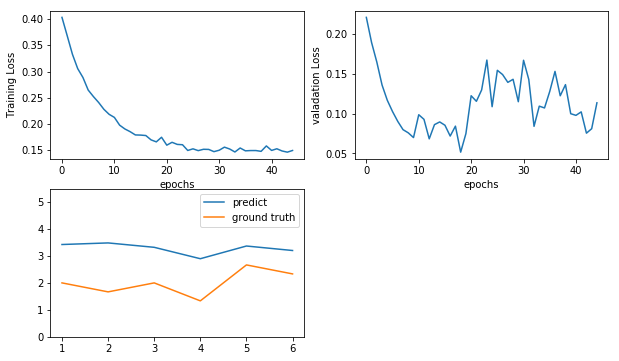

video 113
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 30, 8)        3368        input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 30, 8)        648         conv1d_5[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_2 (MaxPooling1D)  (None, 15, 8)        0           conv1d_6[0][0]                   
__________________________________________________________________________________________________


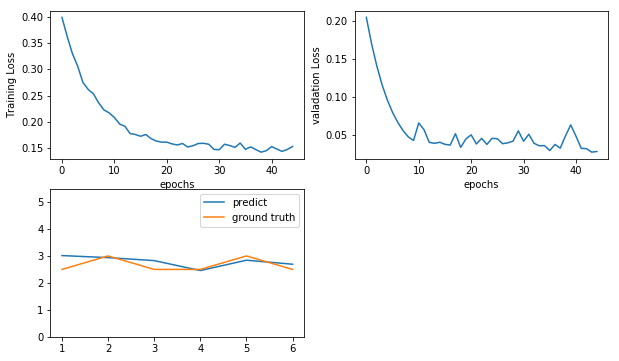

video 130
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 30, 8)        3368        input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 30, 8)        648         conv1d_9[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_3 (MaxPooling1D)  (None, 15, 8)        0           conv1d_10[0][0]                  
__________________________________________________________________________________________________


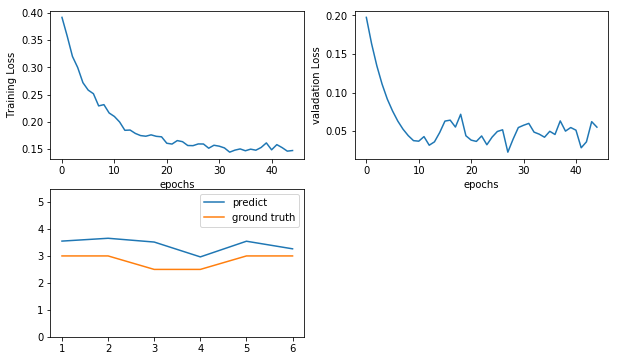

video 143
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 30, 8)        3368        input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 30, 8)        648         conv1d_13[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_4 (MaxPooling1D)  (None, 15, 8)        0           conv1d_14[0][0]                  
__________________________________________________________________________________________________


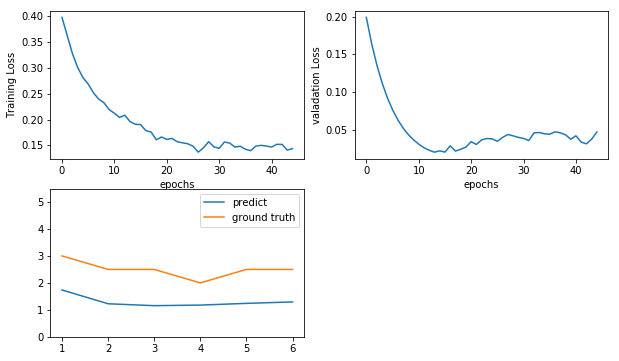

video 152
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 30, 8)        3368        input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_18 (Conv1D)              (None, 30, 8)        648         conv1d_17[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_5 (MaxPooling1D)  (None, 15, 8)        0           conv1d_18[0][0]                  
__________________________________________________________________________________________________


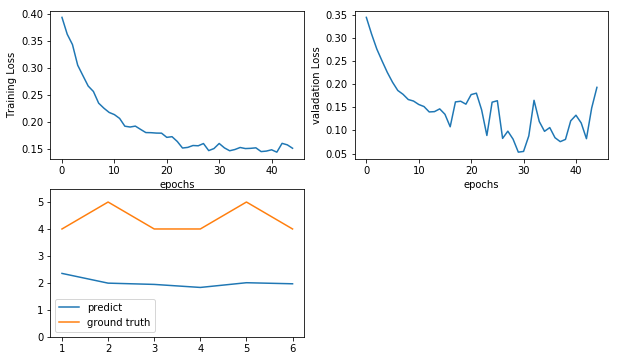

video 164
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_21 (Conv1D)              (None, 30, 8)        3368        input_6[0][0]                    
__________________________________________________________________________________________________
conv1d_22 (Conv1D)              (None, 30, 8)        648         conv1d_21[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_6 (MaxPooling1D)  (None, 15, 8)        0           conv1d_22[0][0]                  
__________________________________________________________________________________________________


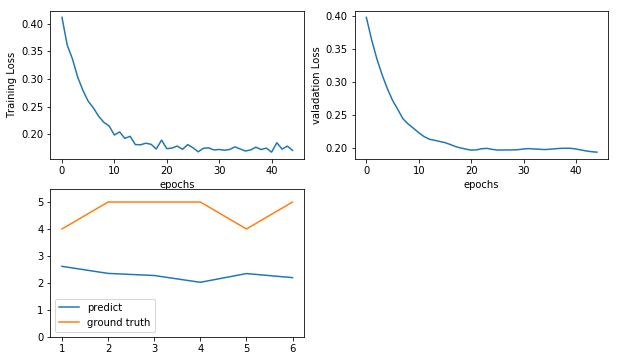

video 16
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_25 (Conv1D)              (None, 30, 8)        3368        input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_26 (Conv1D)              (None, 30, 8)        648         conv1d_25[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_7 (MaxPooling1D)  (None, 15, 8)        0           conv1d_26[0][0]                  
__________________________________________________________________________________________________
c

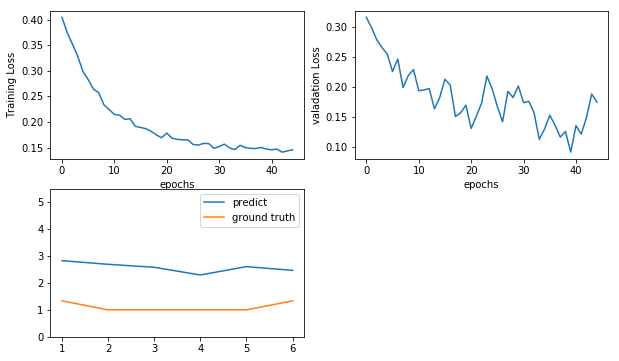

video 171
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_29 (Conv1D)              (None, 30, 8)        3368        input_8[0][0]                    
__________________________________________________________________________________________________
conv1d_30 (Conv1D)              (None, 30, 8)        648         conv1d_29[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_8 (MaxPooling1D)  (None, 15, 8)        0           conv1d_30[0][0]                  
__________________________________________________________________________________________________


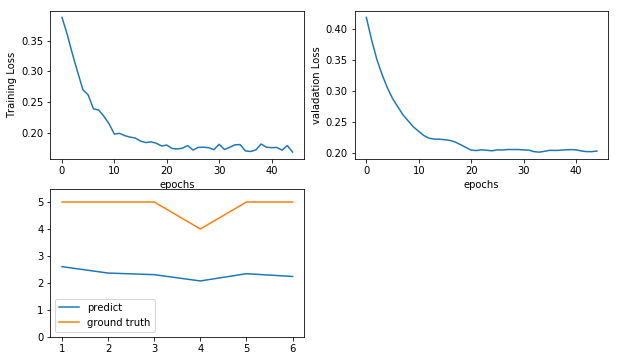

video 192
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_33 (Conv1D)              (None, 30, 8)        3368        input_9[0][0]                    
__________________________________________________________________________________________________
conv1d_34 (Conv1D)              (None, 30, 8)        648         conv1d_33[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_9 (MaxPooling1D)  (None, 15, 8)        0           conv1d_34[0][0]                  
__________________________________________________________________________________________________


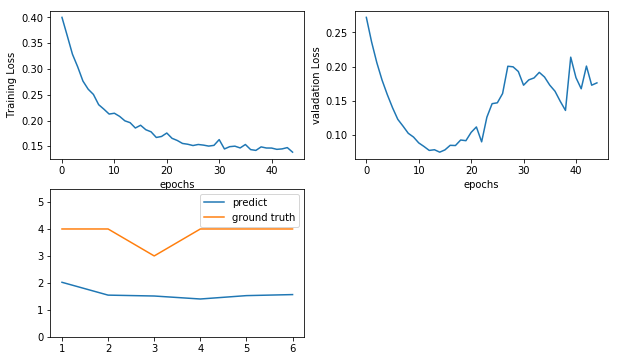

video 176
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_37 (Conv1D)              (None, 30, 8)        3368        input_10[0][0]                   
__________________________________________________________________________________________________
conv1d_38 (Conv1D)              (None, 30, 8)        648         conv1d_37[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_10 (MaxPooling1D) (None, 15, 8)        0           conv1d_38[0][0]                  
__________________________________________________________________________________________________


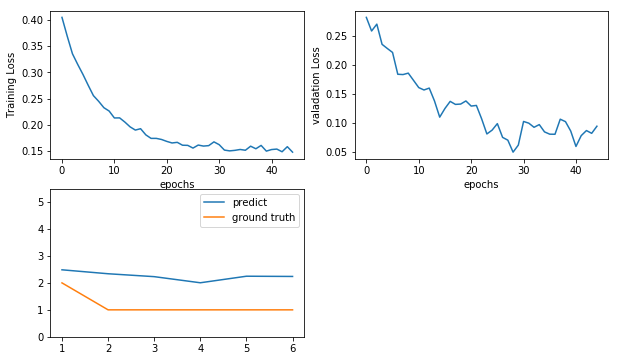

video 207
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_41 (Conv1D)              (None, 30, 8)        3368        input_11[0][0]                   
__________________________________________________________________________________________________
conv1d_42 (Conv1D)              (None, 30, 8)        648         conv1d_41[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_11 (MaxPooling1D) (None, 15, 8)        0           conv1d_42[0][0]                  
__________________________________________________________________________________________________


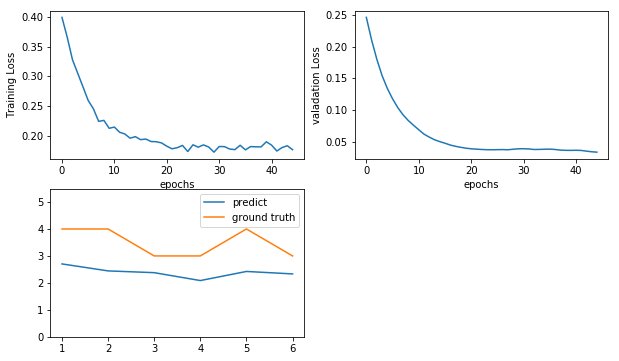

video 194
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_45 (Conv1D)              (None, 30, 8)        3368        input_12[0][0]                   
__________________________________________________________________________________________________
conv1d_46 (Conv1D)              (None, 30, 8)        648         conv1d_45[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_12 (MaxPooling1D) (None, 15, 8)        0           conv1d_46[0][0]                  
__________________________________________________________________________________________________


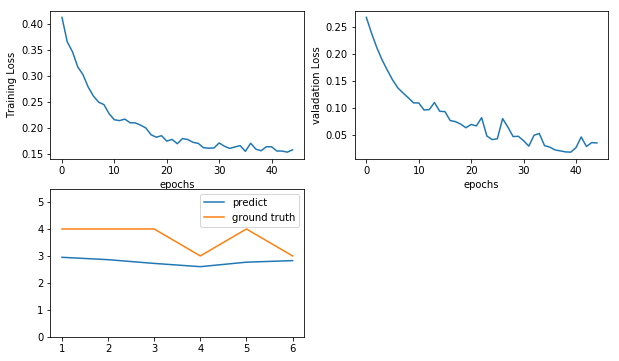

video 236
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_49 (Conv1D)              (None, 30, 8)        3368        input_13[0][0]                   
__________________________________________________________________________________________________
conv1d_50 (Conv1D)              (None, 30, 8)        648         conv1d_49[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_13 (MaxPooling1D) (None, 15, 8)        0           conv1d_50[0][0]                  
__________________________________________________________________________________________________


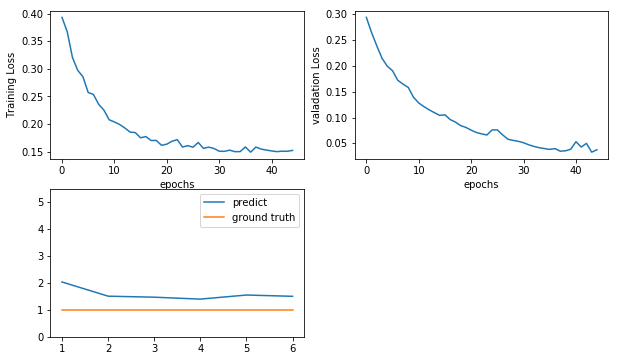

video 237
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_53 (Conv1D)              (None, 30, 8)        3368        input_14[0][0]                   
__________________________________________________________________________________________________
conv1d_54 (Conv1D)              (None, 30, 8)        648         conv1d_53[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_14 (MaxPooling1D) (None, 15, 8)        0           conv1d_54[0][0]                  
__________________________________________________________________________________________________


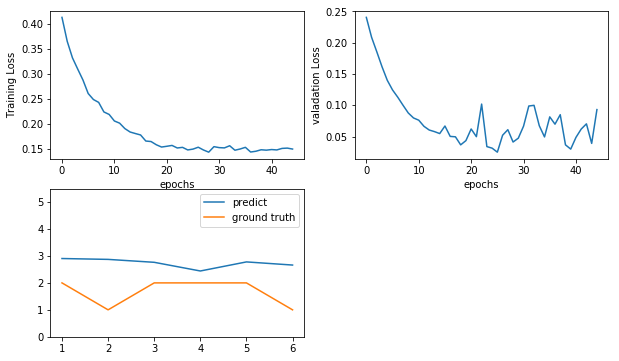

video 240
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_57 (Conv1D)              (None, 30, 8)        3368        input_15[0][0]                   
__________________________________________________________________________________________________
conv1d_58 (Conv1D)              (None, 30, 8)        648         conv1d_57[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_15 (MaxPooling1D) (None, 15, 8)        0           conv1d_58[0][0]                  
__________________________________________________________________________________________________


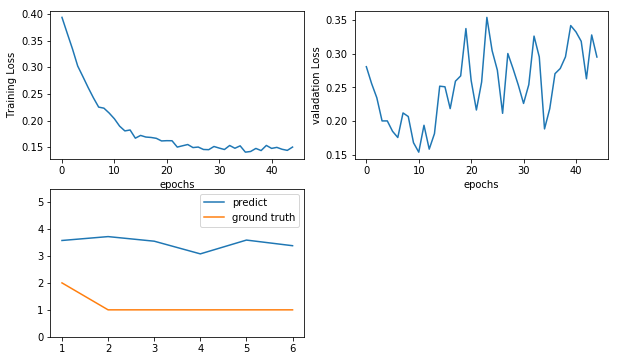

video 253
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_61 (Conv1D)              (None, 30, 8)        3368        input_16[0][0]                   
__________________________________________________________________________________________________
conv1d_62 (Conv1D)              (None, 30, 8)        648         conv1d_61[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_16 (MaxPooling1D) (None, 15, 8)        0           conv1d_62[0][0]                  
__________________________________________________________________________________________________


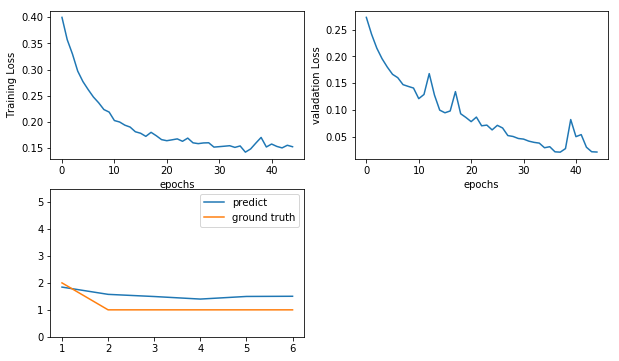

video 258
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_65 (Conv1D)              (None, 30, 8)        3368        input_17[0][0]                   
__________________________________________________________________________________________________
conv1d_66 (Conv1D)              (None, 30, 8)        648         conv1d_65[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_17 (MaxPooling1D) (None, 15, 8)        0           conv1d_66[0][0]                  
__________________________________________________________________________________________________


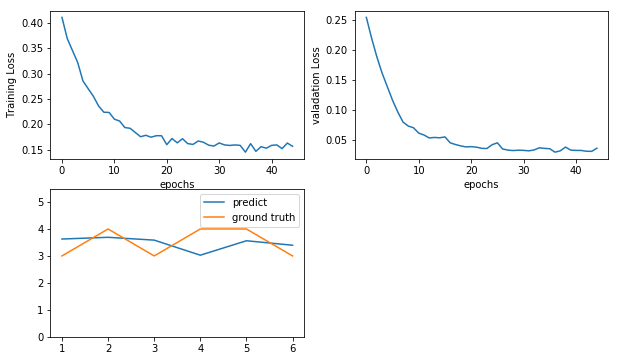

video 257
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_69 (Conv1D)              (None, 30, 8)        3368        input_18[0][0]                   
__________________________________________________________________________________________________
conv1d_70 (Conv1D)              (None, 30, 8)        648         conv1d_69[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_18 (MaxPooling1D) (None, 15, 8)        0           conv1d_70[0][0]                  
__________________________________________________________________________________________________


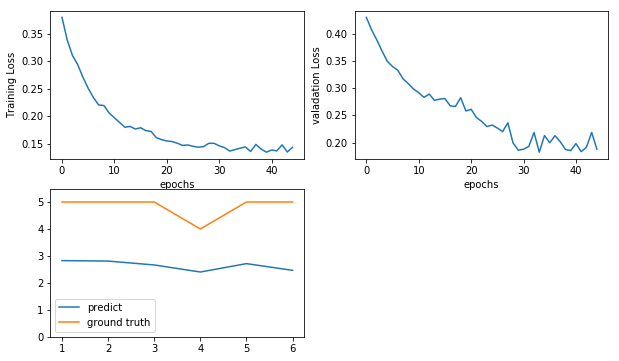

video 49
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_73 (Conv1D)              (None, 30, 8)        3368        input_19[0][0]                   
__________________________________________________________________________________________________
conv1d_74 (Conv1D)              (None, 30, 8)        648         conv1d_73[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_19 (MaxPooling1D) (None, 15, 8)        0           conv1d_74[0][0]                  
__________________________________________________________________________________________________
c

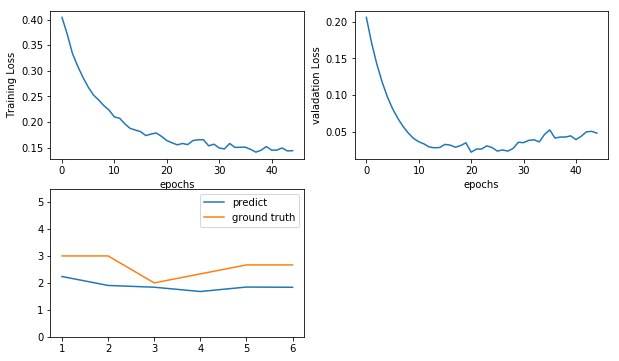

video 59
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_77 (Conv1D)              (None, 30, 8)        3368        input_20[0][0]                   
__________________________________________________________________________________________________
conv1d_78 (Conv1D)              (None, 30, 8)        648         conv1d_77[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_20 (MaxPooling1D) (None, 15, 8)        0           conv1d_78[0][0]                  
__________________________________________________________________________________________________
c

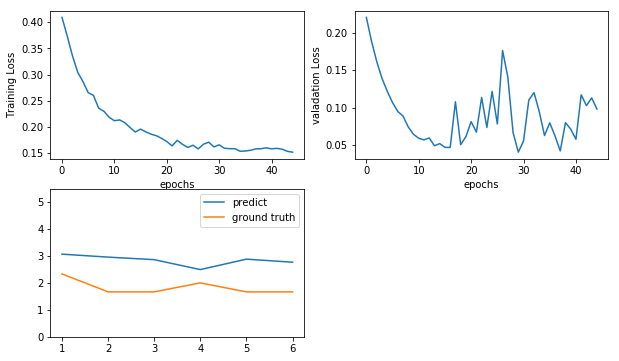

video 74
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_81 (Conv1D)              (None, 30, 8)        3368        input_21[0][0]                   
__________________________________________________________________________________________________
conv1d_82 (Conv1D)              (None, 30, 8)        648         conv1d_81[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_21 (MaxPooling1D) (None, 15, 8)        0           conv1d_82[0][0]                  
__________________________________________________________________________________________________
c

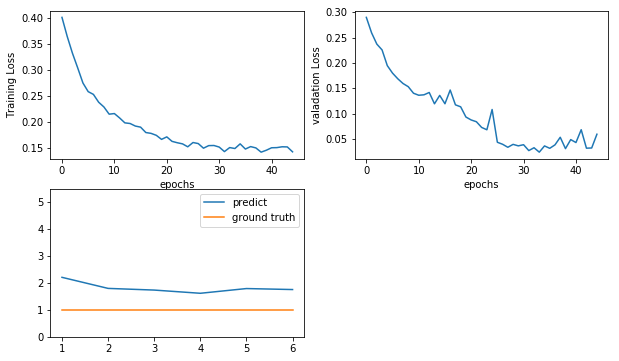

video 78
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_85 (Conv1D)              (None, 30, 8)        3368        input_22[0][0]                   
__________________________________________________________________________________________________
conv1d_86 (Conv1D)              (None, 30, 8)        648         conv1d_85[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_22 (MaxPooling1D) (None, 15, 8)        0           conv1d_86[0][0]                  
__________________________________________________________________________________________________
c

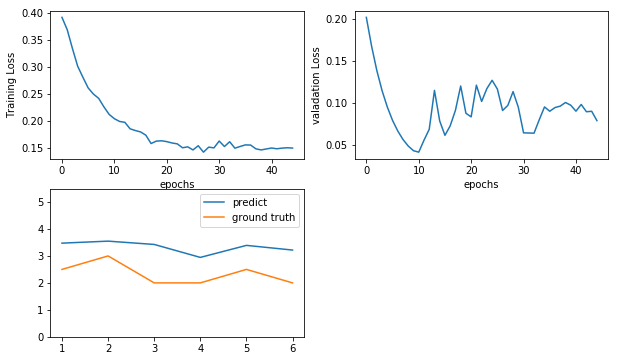

video 91
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_89 (Conv1D)              (None, 30, 8)        3368        input_23[0][0]                   
__________________________________________________________________________________________________
conv1d_90 (Conv1D)              (None, 30, 8)        648         conv1d_89[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_23 (MaxPooling1D) (None, 15, 8)        0           conv1d_90[0][0]                  
__________________________________________________________________________________________________
c

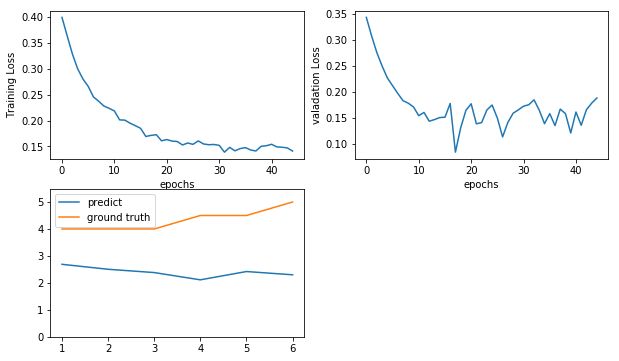

total_loss=  2.4957888573408127


In [26]:
####un-comment the code blow to test all the video
total_loss=0
show_result=True
model_name='CNNF'
for i in Y:
    print('video',i)
    loss=test_hold_out(model_name,i,45,show_result)
    total_loss=total_loss+loss
print('total_loss= ',total_loss)

In [27]:
# ####################################### set video clips parameters
# ############################################### make new 28-d feature
# video_clips_length=[30,60]
# time_lag=[1,2]
# move_threshold=[100,200]
# # stride=int(video_clips_length)

# ####################################### set video clips parameters
# ############################################### make new 28-d feature

# for vl in video_clips_length:
#     for tl in time_lag:
#         for mt in move_threshold:
#             S=[int(vl),int(vl/2)]
#             for stride in S:
#                 print('video_clips_length',vl,' time_lag',tl,'move_threshold',mt,'stride',stride)

#                 all_data=[]
                
#                 for each_video,label in zip(X,Y):

#                     re=get_diff_and_hstack_to_orginal_data(each_video,tl,mt)
#                     video_clip=make_video_clips(re,vl,stride)
#     #                 print(video_clip.shape)
#                     all_data.append((video_clip))
        
#                 total_loss=0
#                 show_result=True
#                 for i in Y:
#                     print('video',i)
#                     loss=test_hold_out(i,show_result)
#                     total_loss=total_loss+loss
#                 print('total_loss= ',total_loss)

In [28]:
# video_clips_length 30  time_lag 1 move_threshold 100 stride 30
# total_loss=  1.412462801206857
# video_clips_length 30  time_lag 1 move_threshold 100 stride 15
# total_loss=  1.4150967202149332
# video_clips_length 30  time_lag 1 move_threshold 200 stride 30
# total_loss=  1.397022263146937
# video_clips_length 30  time_lag 1 move_threshold 200 stride 15
# total_loss=  1.4331296226009727
# video_clips_length 30  time_lag 2 move_threshold 100 stride 30
# total_loss=  1.3969617546536028
# video_clips_length 30  time_lag 2 move_threshold 100 stride 15
# total_loss=  1.4400804012548178
# video_clips_length 30  time_lag 2 move_threshold 200 stride 30
# total_loss=  1.3962573492899537
# video_clips_length 30  time_lag 2 move_threshold 200 stride 15
# total_loss=  1.425527356332168